In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
raw_data = pd.read_csv("sahibinden_dataset.csv")

In [3]:
raw_data.head()

,age,mileage,color,price,listing_age,location,fuel,transmission
0,5,136000,Beyaz,630000,0,İstanbul,dizel,manuel
1,5,221000,Beyaz,678500,1,Antalya,dizel,manuel
2,9,340000,Beyaz,403990,1,İstanbul,dizel,manuel
3,6,199000,Beyaz,529000,1,Antalya,dizel,manuel
4,7,87000,Beyaz,660000,2,İstanbul,dizel,manuel


In [4]:
raw_data.describe()

,age,mileage,price,listing_age
count,962.000000,962.000000,962.000000,962.000000
mean,7.968815,182270.719335,568448.417879,6.599792
std,1.714559,59507.550222,74161.769930,4.207288
min,5.000000,28000.000000,349000.000000,0.000000
25%,7.000000,140000.000000,515000.000000,3.000000
50%,8.000000,177000.000000,570000.000000,6.000000
75%,9.000000,219000.000000,620000.000000,10.000000
max,12.000000,440000.000000,875000.000000,18.000000


In [59]:
# data["fuel"] = LabelEncoder().fit_transform(data["fuel"])
# data["transmission"] = LabelEncoder().fit_transform(data["transmission"])
# data["color"] = LabelEncoder().fit_transform(data["color"])
# data["location"] = LabelEncoder().fit_transform(data["location"])

In [6]:
one_hot = pd.get_dummies(raw_data, columns=["color", "location"], drop_first=True)
one_hot

,age,mileage,price,listing_age,fuel,transmission,color_Bordo,color_Füme,color_Gri,color_Gümüş Gri,...,location_Yalova,location_Yozgat,location_Zonguldak,location_Çanakkale,location_Çankırı,location_Çorum,location_İstanbul,location_İzmir,location_Şanlıurfa,location_Şırnak
0,5,136000,630000,0,dizel,manuel,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,5,221000,678500,1,dizel,manuel,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9,340000,403990,1,dizel,manuel,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,6,199000,529000,1,dizel,manuel,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7,87000,660000,2,dizel,manuel,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,10,161250,565000,15,dizel,manuel,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
958,8,192000,550000,15,dizel,manuel,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
959,6,199000,598500,15,dizel,manuel,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
960,8,105500,665000,13,dizel,manuel,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
one_hot["fuel"] = LabelEncoder().fit_transform(one_hot["fuel"])
one_hot["transmission"] = LabelEncoder().fit_transform(one_hot["transmission"])

In [8]:
sorted_by_value = dict(sorted(one_hot.corr()["price"].to_dict().items(), key=lambda item: item[1]))
sorted_by_value

{'mileage': -0.7403345821036718,
 'age': -0.5323259904477677,
 'location_Gaziantep': -0.11743059390874303,
 'location_Kilis': -0.08094322441273744,
 'location_Giresun': -0.07243798197514552,
 'location_Diyarbakır': -0.054453166248867896,
 'location_Hatay': -0.05388919176849716,
 'location_Şanlıurfa': -0.04978876134178878,
 'location_İstanbul': -0.04969538016696433,
 'color_Gümüş Gri': -0.047824455193722484,
 'color_Kırmızı': -0.03896962249162476,
 'location_Çorum': -0.02978842055289443,
 'location_Tekirdağ': -0.02928541408354154,
 'location_Çankırı': -0.02543646889706923,
 'location_Bursa': -0.024406868611364322,
 'location_Eskişehir': -0.02294607412656546,
 'location_Yalova': -0.02290601845793652,
 'location_Sivas': -0.019057397373400533,
 'location_Düzce': -0.015952725360609498,
 'location_Niğde': -0.015429675467163327,
 'location_Kırşehir': -0.014556589757506191,
 'color_Siyah': -0.012611851064243857,
 'listing_age': -0.011574217484457453,
 'location_Mardin': -0.011094706369812603,


In [5]:
label_encoders = {}
data = raw_data.copy()
for column in ["fuel", "transmission", "color", "location"]:
    le = LabelEncoder()
    data[column] = le.fit_transform(raw_data[column])
    label_encoders[column] = le

In [9]:
# one_hot
data

,age,mileage,color,price,listing_age,location,fuel,transmission
0,5,136000,0,630000,0,59,0,0
1,5,221000,0,678500,1,5,0,0
2,9,340000,0,403990,1,59,0,0
3,6,199000,0,529000,1,5,0,0
4,7,87000,0,660000,2,59,0,0
...,...,...,...,...,...,...,...,...
957,10,161250,6,565000,15,59,0,0
958,8,192000,0,550000,15,59,0,0
959,6,199000,0,598500,15,20,0,0
960,8,105500,0,665000,13,46,0,0


In [10]:
sorted_by_value = dict(sorted(data.corr()["price"].to_dict().items(), key=lambda item: item[1]))
sorted_by_value

{'mileage': -0.7403345821036718,
 'age': -0.5323259904477677,
 'color': -0.03755821239829381,
 'location': -0.029581365786388418,
 'listing_age': -0.011574217484457453,
 'price': 1.0,
 'fuel': nan,
 'transmission': nan}

In [11]:
correlation_metrics = pd.DataFrame(data.corr()["price"]).sort_values(by="price")
correlation_metrics

,price
mileage,-0.740335
age,-0.532326
color,-0.037558
location,-0.029581
listing_age,-0.011574
price,1.000000
fuel,NaN
transmission,NaN


In [12]:
x = data["price"].tolist()
x.sort()

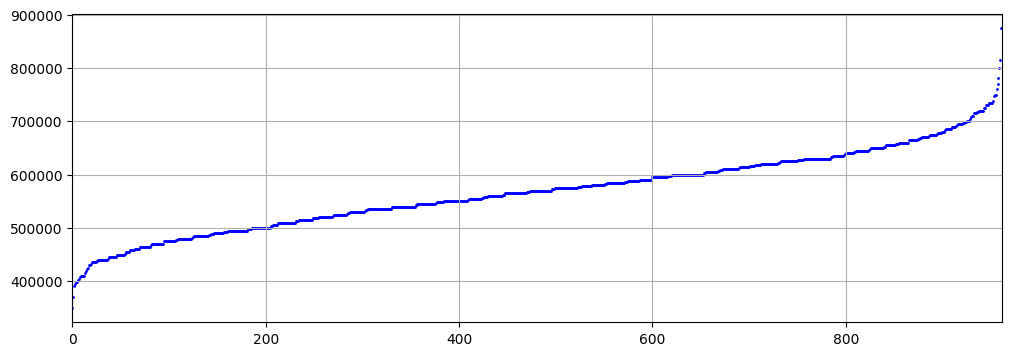

In [13]:
plt.figure(figsize=(12,4))
plt.scatter(np.arange(len(x)), x, marker="o", color="b", s=1)
plt.xlim(0, len(x))
plt.grid(True)
plt.ylabel = "Price"
# plt.xlabel 
plt.show()

<Axes: ylabel='Frequency'>

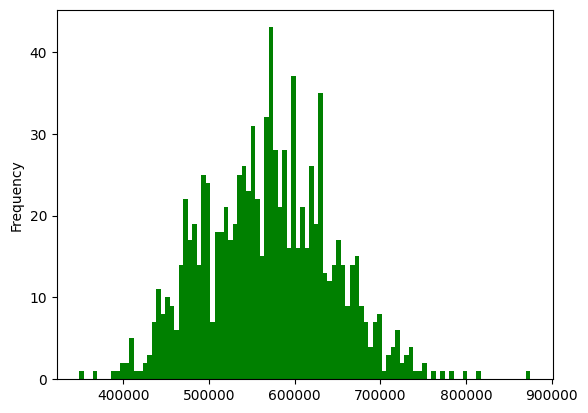

In [14]:
data.price.plot(kind="hist", bins=100, color="g")

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
x = data.drop(["price"], axis=1).values

In [18]:
y = data.price.values.reshape(-1, 1)

In [19]:
lr.fit(x, y)

LinearRegression()

In [ ]:
# lr.predict(x)

In [21]:
linear_regresssion_df = pd.DataFrame([y.flatten().tolist(), lr.predict(x).flatten().tolist()]).T

In [22]:
linear_regresssion_df.columns = ["price_real", "price_predicted"]

In [31]:
linear_regresssion_df["variation"] = abs((linear_regresssion_df["price_predicted"]-linear_regresssion_df["price_real"]) / linear_regresssion_df["price_real"] * 100)

In [32]:
linear_regresssion_df

,price_real,price_predicted,variation
0,630000.0,634514.484549,0.716585
1,678500.0,582953.316775,14.082046
2,403990.0,422005.036146,4.459278
3,529000.0,587610.779728,11.079542
4,660000.0,648138.209528,1.797241
...,...,...,...
957,565000.0,556056.116613,1.582988
958,550000.0,554451.949256,0.809445
959,598500.0,585713.355750,2.136448
960,665000.0,626381.954468,5.807225


In [33]:
linear_regresssion_df.variation.mean()

5.972062892859423

In [34]:
individual_test_data = {
    "fuel": "dizel",
    "transmission": "manuel",
    "color": "Beyaz",
    "location": "İstanbul",
    "age": 2,
    "mileage": 14500,
    "listing_age": 7
}
individual_test_data = pd.DataFrame([individual_test_data])

In [26]:
for column in ["fuel", "transmission", "color", "location"]:
    individual_test_data[column] = label_encoders[column].transform(individual_test_data[column])

In [27]:
individual_test_data= individual_test_data.values.reshape(-1, 7)

In [29]:
lr.predict(individual_test_data)[0,0]

832831.1865458703